<font size ="6">**Fake-News Detection**</font>


The goal of this research is to create a machine learning-based system that can identify false news articles. The objective is to detect fake news stories that include false information. For testing and training purposes, this project makes use of the extensive ISOT Fake News dataset.
Beginning with tidying up and preparing the data is a crucial first stage in the endeavor. Placeholders for URLs, numbers, and emails are used to standardize the text data. All punctuation, capitalization, and HTML elements are stripped out of the text. Additional data cleansing steps include using stemming algorithms and excluding stopwords.
Parallelization methods are used to increase processing efficiency. To speed up the preparation procedures, the data is split up into smaller pieces and processed in parallel.
In order to identify bogus news, feature extraction is essential. The preprocessed text is converted into numerical features using natural language processing algorithms. Uni-, bi-, and tri-grams are generated to capture various patterns and connections in the text.
The false news detection system is trained and tested using many machine learning models. Naive Bayes, SVM, Logistic Regression, and MLP are some examples of these types of models. A number of criteria, including accuracy, precision, recall, and F1 score, are used to evaluate the models. The goal is to find the best model for reliably labeling news stories as phony or real.
This project's results shed light on how machine learning may be used to spot disingenuous articles. Using sophisticated natural language processing (NLP) methods, preprocessing, and feature extraction, the system can reliably detect false or misleading news stories. The merits and limitations of several machine learning models are revealed via comparison, allowing for the best model for false news detection to be chosen.
Overall, the success of this study shows how machine learning may be used to prevent the harmful impacts of false news. As the problems with identifying false news continue to evolve, new and better methods may be developed and used.



<font size ="4">**Importing all the libraries**</font>

In [137]:
import pandas as pd

In [136]:

from sklearnex import patch_sklearn , unpatch_sklearn
patch_sklearn()



import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import re
import nltk
import os
nltk.download('punkt')
nltk.download('stopwords')




from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression




import string

from sklearn.model_selection import train_test_split


import re
import string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import multiprocessing

from tqdm.notebook import tqdm
tqdm.pandas()

import pickle

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
[nltk_data] Downloading package punkt to /home/u194461/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/u194461/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [138]:
from sklearn.feature_extraction.text import CountVectorizer
import joblib

In [139]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Functions from **tqdm** are used to display progress bars during parallel
processing.

Functions from re are used for pattern matching and text processing.

Functions from **nltk** are used for downloading and accessing datasets and resources for text preprocessing.

Functions from **os** are used for creating directories and checking file existence.

The **CountVectorizer** class from **sklearn.feature_extraction.text** is used for feature extraction.

Functions from **joblib** are used for caching and loading processed data and features.

The **MultinomialNB** class from **sklearn.naive_bayes** is used for training a Naive Bayes classifier.

Functions from **sklearn.metrics** are used for evaluating classification performance.

The **RandomForestClassifier** class from **sklearn.ensemble** is used for training a random forest classifier.

The **SVC** class from **sklearn.svm** is used for training a support vector classifier.

The **LogisticRegression** class from **sklearn.linear_model** is used for training a logistic regression classifier.

The **MLPClassifier** class from **sklearn.neural_network** is used for training a multi-layer perceptron classifier.



<font size ="4">**Downloading the dataset and extracting it to the appropriate data directory.**</font>

In [21]:
# data_directory = 'data/'
# if not os.path.exists(data_directory):
#     !mkdir data/
#     !wget https://onlineacademiccommunity.uvic.ca/isot/wp-content/uploads/sites/7295/2023/03/News-_dataset.zip --directory-prefix=data/
#     !unzip data/News-_dataset.zip -d data/

<font size="4">**Read the data csv file**</font>

In the section, it reads the contents of the "Fake.csv" file into a Pandas DataFrame called **fake_data**. It displays the first few rows of the DataFrame to provide a preview of the data.

Next cell  reads the contents of the "True.csv" file into a Pandas DataFrame called **true_data**. It displays the first few rows of the DataFrame to provide a preview of the data.

The purpose of these cells is to load the data from the "Fake.csv" and "True.csv" files into separate DataFrames. These DataFrames are then used in subsequent cells for data preprocessing, merging, and model training.

In [140]:
fake_data = pd.read_csv('data/Fake.csv')
fake_data.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [141]:
true_data = pd.read_csv('data/True.csv')
true_data.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# **Exploratory Data Analysis**

**Data Overview:**
Print the shape of the dataset (number of rows and columns).
Display a few rows of the dataset using the **head()** function to get an initial understanding of the data structure.

**Class Balance:**
Determine the class distribution of the target variable (label) by calculating the count or percentage of each class. Visualize the class balance using a bar plot or pie chart to assess if the dataset is imbalanced.

**Text Analysis:**
Analyze the length of news articles (e.g., word count) to identify any patterns or outliers. Explore the most common words or phrases in fake and genuine news articles using word frequency analysis or word clouds. Generate n-gram plots to identify frequently occurring word sequences.

**WordCloud:**
A word cloud is a graphical representation of the most frequent words in a text dataset. To create a word cloud, we need to preprocess the text data and concatenate it into a single string. Then, using the WordCloud library, we can generate the word cloud by specifying parameters like width, height, and maximum number of words.

**Tolerance Checking:**
Tolerance checking in exploratory analysis involves assessing the presence of multicollinearity among predictor variables. It is done by computing the correlation matrix and evaluating the tolerance values. Tolerance represents the reciprocal of the **variance inflation factor (VIF)**, with lower values indicating higher collinearity. If tolerance values fall below a certain threshold, typically around 0.1 or 0.2, further investigation is needed.

**Data Visualization:**
Create visualizations to explore the distribution of the target variable (label) using techniques like bar plots or pie charts.
Visualize the distribution of other relevant features in the dataset using histograms, box plots, or count plots.
Plot word clouds to visualize the most frequent words in fake and genuine news articles.

**Temporal Analysis:**
The news articles are analyzed based on the year they were published. A count plot is created to show the distribution of articles over the years






<font size="4">**Assigning Classes to the Dataset**</font>

In this section, two additional columns are added to the true_data and fake_data DataFrames. The purpose of this cell is to label the articles as either "real" or "fake" by assigning a binary value to the newly created "label" column.

The code true_data["label"] = 1 adds a new column called "label" to the true_data DataFrame and assigns the value 1 to all rows in that column. This indicates that these articles are labeled as "real" news.

Similarly, the code fake_data["label"] = 0 adds a new column called "label" to the fake_data DataFrame and assigns the value 0 to all rows in that column. This indicates that these articles are labeled as "fake" news.

By assigning these binary labels, it becomes easier to train a classification model later on, as the model can use the "label" column as the target variable for predicting whether an article is real or fake.

In [142]:
true_data["label"] = 1
fake_data["label"] = 0


<font size="4">**Merging Both the Dataset**</font>

The **pd.concat()** function from the pandas library is used to concatenate the DataFrames. It takes a list of DataFrames to concatenate and the axis parameter is set to 0 to concatenate along the rows.

After executing this section, the data DataFrame will contain all the rows from true_data followed by all the rows from fake_data. The DataFrame will have the same columns as the original DataFrames, including the newly added "label" column that distinguishes between real and fake news articles.

In [144]:
data = pd.concat([true_data, fake_data], axis=0)
data.tail()


,title,text,subject,date,label
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [146]:
# Data Overview
print("Data Shape:", data.shape)
print("Sample News Article:", data['text'][0])
print("Sample Label:", data['label'][0])



Data Shape: (44898, 5)
Sample News Article: 0    WASHINGTON (Reuters) - The head of a conservat...
0    Donald Trump just couldn t wish all Americans ...
Name: text, dtype: object
Sample Label: 0    1
0    0
Name: label, dtype: int64


In [147]:
# Class Balance
class_counts = data['label'].value_counts()
class_percentages = data['label'].value_counts(normalize=True) * 100
print("Class Distribution:\n", class_counts)
print("Class Distribution (%):\n", class_percentages)

Class Distribution:
 label
0    23481
1    21417
Name: count, dtype: int64
Class Distribution (%):
 label
0    52.298543
1    47.701457
Name: proportion, dtype: float64


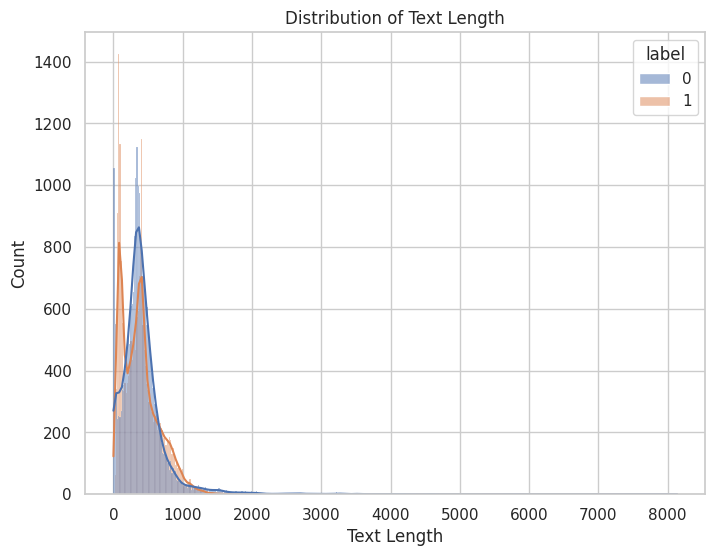

In [148]:
# Text Analysis
data['text_length'] = data['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='text_length', hue='label', kde=True)
plt.title("Distribution of Text Length")
plt.xlabel("Text Length")
plt.ylabel("Count")
plt.show()


Fake News Text Length: 59838891
Genuine News Text Length: 51064092
Sample Fake News Text: Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had
Sample Genuine News Text: WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted


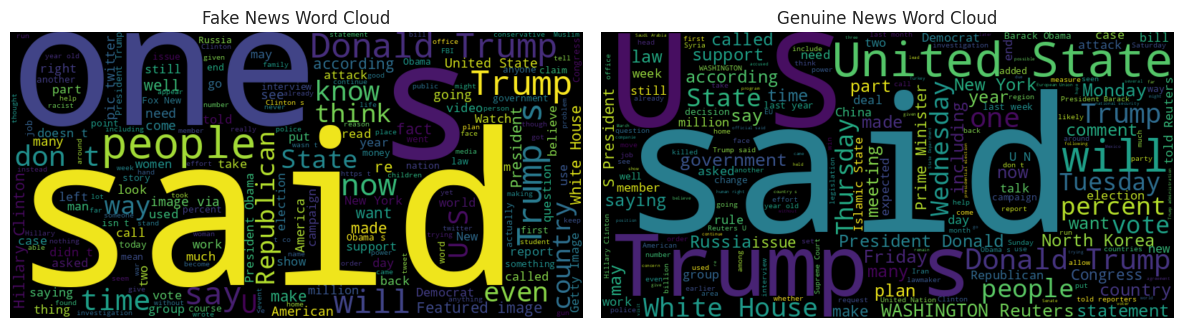

In [132]:
#Word Cloud
from wordcloud import WordCloud


fake_text = " ".join(data[data['label'] == 0]['text'])
genuine_text = " ".join(data[data['label'] == 1]['text'])

# Print the length of the text data
print("Fake News Text Length:", len(fake_text))
print("Genuine News Text Length:", len(genuine_text))

# Print a sample of the text data
print("Sample Fake News Text:", fake_text[:100])
print("Sample Genuine News Text:", genuine_text[:100])

# Check if the text data is empty
if len(fake_text) == 0 or len(genuine_text) == 0:
    print("No text available to generate word cloud.")
else:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    wordcloud_fake = WordCloud(width=800, height=400).generate(fake_text)
    plt.imshow(wordcloud_fake, interpolation='bilinear')
    plt.title("Fake News Word Cloud")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    wordcloud_genuine = WordCloud(width=800, height=400).generate(genuine_text)
    plt.imshow(wordcloud_genuine, interpolation='bilinear')
    plt.title("Genuine News Word Cloud")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


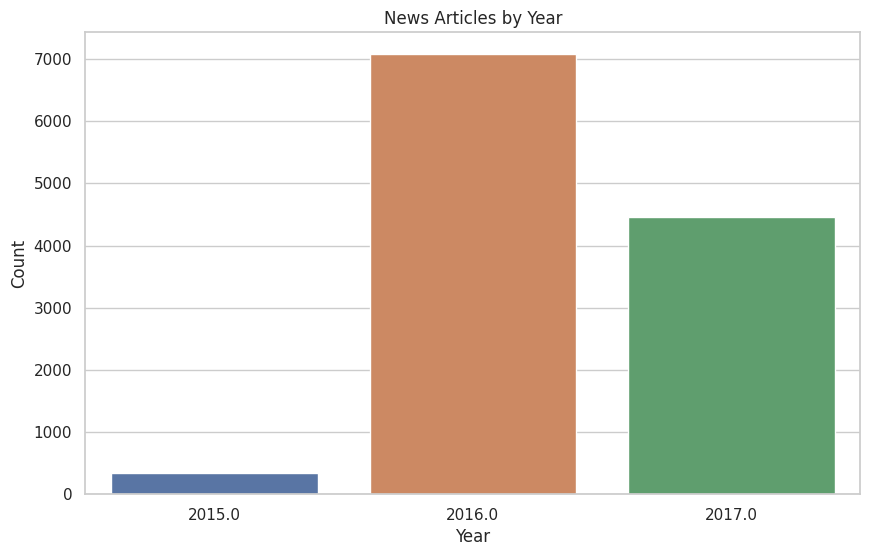

In [133]:
data['date'] = pd.to_datetime(data['date'], format="%B %d, %Y", errors='coerce')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='year')
plt.title("News Articles by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


label
0    23481
1    21417
Name: count, dtype: int64


<font size="4">**Visualization of the text data based on subject column**</font>

The **sns.countplot()** function from the seaborn library is used to create the plot. It takes the DataFrame data as input and specifies the column to be counted. The count plot displays the frequency of each unique subject category on the x-axis.

The **chart.set_xticklabels()** function is used to rotate and set the x-axis labels to be more readable. It takes the x-axis labels from the chart object and applies a rotation of 90 degrees to make the labels vertical.

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

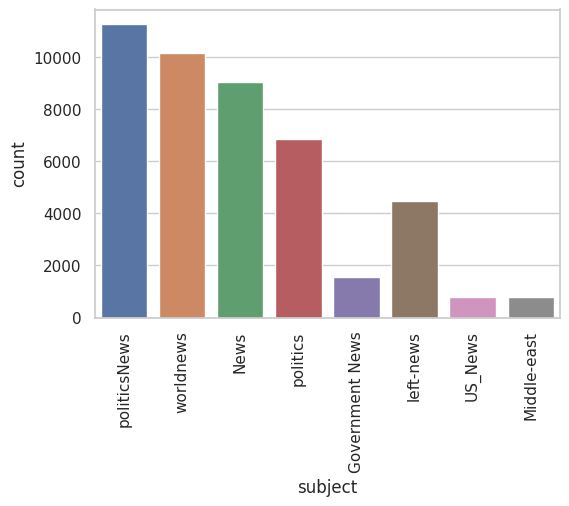

In [149]:
plt.figure(figsize = (6,4))
sns.set(style = "whitegrid",font_scale = 1.0)
chart = sns.countplot(x = "subject", data = data)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

<font size="4">**Data preprocessing**</font>

In this cell, the code combines the "title" and "text" columns of the data DataFrame into a single column called "text". The original "title", "subject", and "date" columns are then deleted from the DataFrame. This consolidation of text data simplifies the subsequent preprocessing steps.

After combining the columns, this cell displays the first few rows of the data DataFrame to verify the changes made in the previous cell.





In [150]:
data['text'] = data['title'] +' '+data['text']
# Either you could data.drop["column names"] or del data["column names"]
del data['title']
del data['subject']
del data['date']



In [ ]:
del data['month']
del data['year']

In [152]:
data.head()

,text,label,text_length
0,"As U.S. budget fight looms, Republicans flip t...",1,749
1,U.S. military to accept transgender recruits o...,1,624
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1,457
3,FBI Russia probe helped by Australian diplomat...,1,376
4,Trump wants Postal Service to charge 'much mor...,1,852


As the title, author column will not going to be helpful in identification of the news. So, we can drop these column.

In [153]:
data.shape

(44898, 3)

Checks for any missing values in the **data** DataFrame and sums up the count of missing values for each column.

In [154]:
data.isnull().sum() # get the count of missing/NULL values for each column. if present remove missing values

text           0
label          0
text_length    0
dtype: int64

Randomly shuffles the rows of the **data** DataFrame using the *sample()** function, ensuring a randomized order.

In [155]:
#Shuffling the data by sampling it randomly, then resetting the index and dropping the previous index column
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,text,label,text_length
0,Prominent Holocaust Attorney Files MASSIVE La...,0,575
1,Patrick Henningsen and Don DeBar Discuss Trump...,0,492
2,HOLY GLOBALIST SLAM! Nigel Farage Brilliantly ...,0,179
3,CHELSEA CLINTON Lashes Out At TRUMP “Hate Spee...,0,279
4,NEW YORK TIMES BUSTED: Undercover Video Expose...,0,521


Now Let’s explore the unique values in the each category using below code.

Creates a count plot to visualize the distribution of the "label" column in the **data** DataFrame. It displays the count of real and fake news articles, providing insights into the class balance of the dataset.

<Axes: xlabel='label', ylabel='count'>

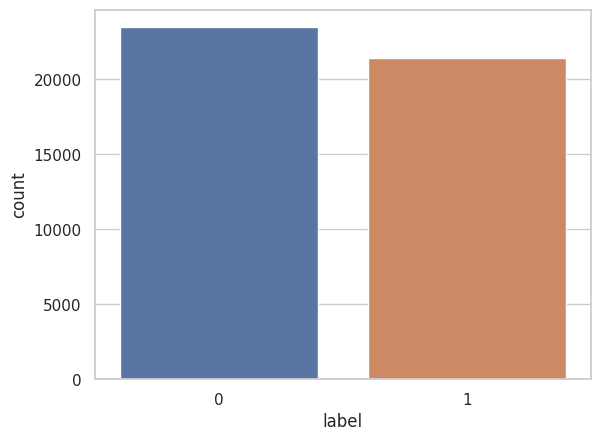

In [156]:

sns.countplot(data=data, x='label', order=data['label'].value_counts().index)


<font size="4">**Data Cleaning**</font>

This section defines text preprocessing functions and applies them to the "text" column of the **data** DataFrame. It uses multiprocessing to speed up the processing. The processed chunks are combined into a new DataFrame called **processed_data**.

This cell defines the **prepare_data()** function for text data preprocessing. It preprocesses the train and test data, caches the results, and returns the preprocessed text and labels. The train and test data are split using **train_test_split()** and then preprocessed using **prepare_data()**. The preprocessed data is stored in **train_X, test_X, train_y, and test_y**.

In [158]:
def preprocess_text(text):
    # Normalize links replacing them with the str 'link'.
    text = re.sub('http\S+', 'link', text)

    # Normalize numbers replacing them with the str 'number'.
    text = re.sub('\d+', 'number', text)

    # Normalize emails replacing them with the str 'email'.
    text = re.sub('\S+@\S+', 'email', text, flags=re.MULTILINE)

    # Remove HTML tags using BeautifulSoup
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove punctuation.
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove whitespaces.
    text = text.strip()

    # Convert all letters to lower case.
    text = text.lower()

    # Create the stemmer.
    stemmer = SnowballStemmer('english')

    # Split text into words.
    words = text.split()

    # Remove stopwords.
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if w not in stop_words]

    # Stem words.
    words = [stemmer.stem(w) for w in words]

    text = ' '.join(words)

    return text

def preprocess_text_parallel(data_chunk):
    # Apply preprocessing to the 'text' column in the data chunk
    data_chunk['text'] = data_chunk['text'].apply(preprocess_text)
    return data_chunk

# Split the data into chunks for parallel processing
chunk_size = 1000
data_chunks = [data[i:i+chunk_size] for i in range(0, len(data), chunk_size)]

# Create a pool of worker processes
pool = multiprocessing.Pool()

# Apply preprocessing in parallel to each data chunk
processed_chunks = pool.map(preprocess_text_parallel, data_chunks)

# Combine the processed data chunks back into a single DataFrame
processed_data = pd.concat(processed_chunks)

# Close the pool of worker processes
pool.close()
pool.join()

/home/u194461/tmp/ipykernel_3289990/183509725.py:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
/home/u194461/tmp/ipykernel_3289990/183509725.py:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
/home/u194461/tmp/ipykernel_3289990/183509725.py:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
/home/u194461/tmp/ipykernel_3289990/183509725.py:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful S

In [159]:
def prepare_data(data_train, data_test, labels_train, labels_test,
                    cache_dir, cache_file="preprocessed_data.pkl"):
    """
    This function caches the results. This is because performing this processing step can take a long time.
    This way if you are unable to complete the notebook in the current session, you can come back without needing to process the data a second time
    Args:
        data_train (pandas series): A pandas series with train data.
        data_test (pandas series): A pandas series with test data.
        labels_train (pandas series): A pandas series with train target labels.
        labels_test (pandas series): A pandas series with test target labels.
        cache_dir (str): The directory of the datasets.
        cache_file (str, optional): The name of the preprocessed file. Defaults to "preprocessed_data.pkl".

    Returns:
        lists: Lists of cleaned text for train and test data.
        pandas series: Pandas series for train and test data indicating the labels.
    """
    # If cache_file is not None, try to read from it first.
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = pickle.load(f)
            print("Read preprocessed data from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay.

    # If cache is missing, then do the heavy lifting.
    if cache_data is None:
        # Preprocess training and test data to obtain precessed text for each review
        text_train = data_train.progress_apply(preprocess_text)
        text_test = data_test.progress_apply(preprocess_text)

        # Write to cache file for future runs.
        if cache_file is not None:
            cache_data = dict(text_train=text_train, text_test=text_test,
                              labels_train=labels_train, labels_test=labels_test)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                pickle.dump(cache_data, f)
            print("Wrote preprocessed data to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file
        text_train, text_test, labels_train, labels_test = (cache_data['text_train'],
                cache_data['text_test'], cache_data['labels_train'], cache_data['labels_test'])

    return text_train, text_test, labels_train, labels_test

df = data

train_X, test_X, train_y, test_y = train_test_split(df.text, df.label, test_size=0.2,
                                                    random_state=5)

print("Fake and True News (combined): train = {}, test = {}".format(len(train_X), len(test_X)))
print(train_X[3])
print(train_y[3])
# preprocess_text(train_X[3])

# Preprocess data.D
train_X, test_X, train_y, test_y = prepare_data(train_X, test_X, train_y, test_y, cache_dir='data/')

Fake and True News (combined): train = 35918, test = 8980
CHELSEA CLINTON Lashes Out At TRUMP “Hate Speech” In Appearance at MSU: “That’s not our country” Has she seen what s going on with her mom s buddies at Black Lives Matter? The violence and hate is astounding!How about her own mother s hateful rant to Union members admonishing them in a big way: Michigan State University students were delighted to hear that Democratic presidential nominee Hillary Clinton has a plan to relieve them of at least some of their massive college loan debts.The message was delivered Thursday night to a packed MSU Union lobby by the candidate s daughter, Chelsea Clinton, who s stumping for her mother in Michigan. Federal loans would automatically be set to the prevailing interest rate,  she said.  Right now Interest rates are low, and if we can renegotiate mortgages and our car loans we should be able to have our federal student loans set to the lowest rate. Clinton s speech lasted eight minutes without a

<font size="4">**Converting text into Vectors**</font>

This section uses the **CountVectorizer** class from **scikit-learn** to extract features from the preprocessed text data. It creates a vocabulary of uni-, bi-, and tri-grams from the training data and applies it to both the training and test data. The extracted features are returned as arrays, along with the vocabulary. Then it applies the **feature extraction** process to the preprocessed train and test text data. It uses the **extract_features()** function, which applies the **CountVectorizer** to transform the words in the text data into numerical features. The extracted features are returned as arrays, along with the vocabulary.

In [160]:
def extract_features(words_train, words_test, vocabulary_size, cache_dir, cache_file="features.pkl"):
    """This function caches a word dictionary. This is because performing this processing step can take a long time.
    This way if you are unable to complete the notebook in the current session,
    you can come back without needing to process the data a second time.
    Args:
        words_train (list): A list of cleaned words.
        words_test (pandas series): A pandas series of the labels.
        vocabulary_size (int): The maximum number of features.
        cache_dir (str): The directory of the data.
        cache_file (str, optional): The name of the resulted file. Defaults to "features.pkl".

    Returns:
        numpy arrays: Arrays of features for train and test data.
        dictionary: A dictionary containing a vocabulary of uni-, bi-, and tri-grams.
    """
    # If cache_file is not None, try to read from it first.
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = joblib.load(f)
            print("Read features from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay.

    # If cache is missing, then do the heavy lifting.
    if cache_data is None:
        # Fit a vectorizer to training documents and use it to transform them
        # NOTE: Training documents have already been preprocessed and tokenized into words;
        #       pass in dummy functions to skip those steps, e.g. preprocessor=lambda x: x
        vectorizer = CountVectorizer(ngram_range=(1, 3), max_features=vocabulary_size,
                                     stop_words='english', analyzer = 'word')
        features_train = vectorizer.fit_transform(words_train).toarray()

        # Apply the same vectorizer to transform the test documents (ignore unknown words).
        features_test = vectorizer.transform(words_test).toarray()

        # NOTE: Remember to convert the features using .toarray() for a compact representation.

        # Write to cache file for future runs (store vocabulary as well).
        if cache_file is not None:
            vocabulary = vectorizer.vocabulary_
            cache_data = dict(features_train=features_train, features_test=features_test,
                             vocabulary=vocabulary)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                joblib.dump(cache_data, f)
            print("Wrote features to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file.
        features_train, features_test, vocabulary = (cache_data['features_train'],
                cache_data['features_test'], cache_data['vocabulary'])

    # Return both the extracted features as well as the vocabulary.
    return features_train, features_test, vocabulary



In [161]:
# Extract Bag of Words features for both training and test datasets.
train_X, test_X, vocabulary = extract_features(train_X, test_X, 5000, cache_dir='data')

Read features from cache file: features.pkl


The **extract_features()** function takes as input the preprocessed train and test text data, the maximum number of features, the directory where the cache file is stored, and the optional cache file name.

The purpose of this function is to extract features from the preprocessed text data using the **Word2Vec** model and cache the results for future use. The **Word2Vec model** is trained on the training data and used to transform both the training and test data into numerical feature vectors.

This cell prints the feature vector representation of a specific training example **(train_X[5])** and its length.

This section prints the **top 20 words** from the vocabulary along with their corresponding indices. The vocabulary contains the mapping of words to indices in the feature vector representation.

In [163]:
# Use this cell to examine one of the processed reviews to make sure everything is working as intended.
print(train_X[5])
print(len(train_X[5]))

[0 0 0 ... 0 0 0]
5000


In [162]:
# Print some n-grams from the dictionary.
for key in sorted(vocabulary, key=vocabulary.get, reverse=True)[:20]:
    print(key, ':', vocabulary[key])

zuma : 4999
zone : 4998
zimbabw : 4997
zika : 4996
zero : 4995
zealand : 4994
youtub : 4993
youth : 4992
younger : 4991
young peopl : 4990
young : 4989
york time report : 4988
york time : 4987
york reuter : 4986
york citi : 4985
york : 4984
yield : 4983
yesterday : 4982
yes : 4981
yemen : 4980


<font size="4">**Model training, Evaluation, and Prediction**</font>

In this section, a Naive Bayes classifier model **(MultinomialNB)** is instantiated and trained using the **train_X** and **train_y** data. The model learns the patterns and relationships in the feature vectors **(train_X)** and their corresponding labels **(train_y)**, enabling it to make predictions.

Then itapplies the trained **Naive Bayes classifier model** to the test data **(test_X)** and generates predictions. The predicted labels are compared against the true labels **(test_y)** to evaluate the model's performance. The confusion matrix, classification report, and a visual representation of the confusion matrix are printed to assess the model's accuracy, precision, recall, and other classification metrics.



In [164]:
#TODO: Model training and print the accuracy score
# Build and fit the model.
model = MultinomialNB()
model.fit(train_X, train_y)

MultinomialNB()

[[4425  248]
 [ 138 4169]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4673
           1       0.94      0.97      0.96      4307

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



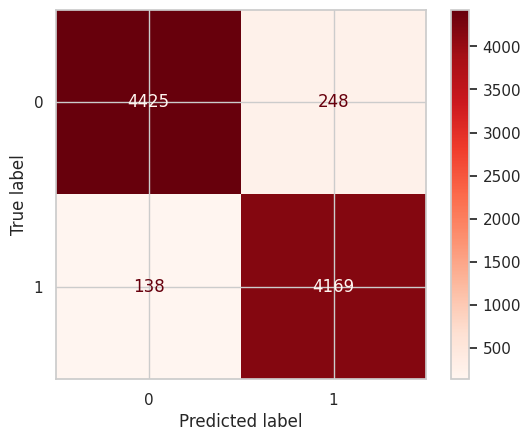

In [165]:
# Display the Confusion matrix of Results from your classification algorithm
# Make and save the predictions.
predictions = model.predict(test_X)

print(confusion_matrix(test_y, predictions))
c5=classification_report(test_y, predictions)
print(c5)
    
ConfusionMatrixDisplay.from_estimator(model, test_X, test_y, cmap='Reds')


In [166]:
accuracy_score(test_y, predictions)

0.9570155902004455

<font size="4">**SVM**</font>

In this section, a **Support Vector Classifier model**  is instantiated and trained using the **train_X** and **train_y** data. The model learns the patterns and relationships in the feature vectors (**train_X**) and their corresponding labels (**train_y**), enabling it to make predictions.

It applies the trained Support Vector Classifier model to the test data (**test_X**) and generates predictions. The predicted labels are compared against the true labels (**test_y**) to evaluate the model's performance.

At last, the accuracy score of the Support Vector Classifier model is computed by comparing the predicted labels with the true labels (**test_y**).

In [167]:
#TODO: Model training and print the accuracy score
# Build and fit the model.
# model = MultinomialNB()
patch_sklearn()
from sklearn.svm import SVC

# Create a Random Forest model
model2 = SVC()

model2.fit(train_X, train_y)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


SVC()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4673
           1       0.99      0.99      0.99      4307

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



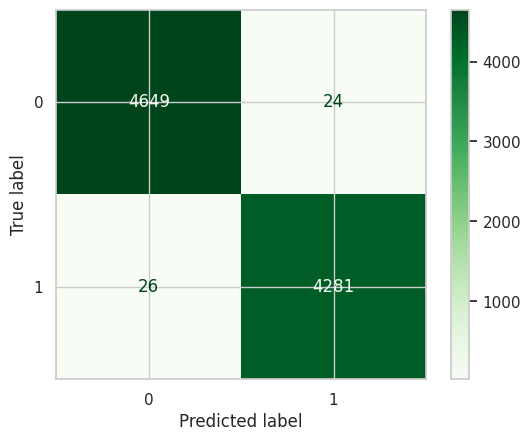

In [168]:
# Display the Confusion matrix of Results from your classification algorithm
# Make and save the predictions.
predictions = model2.predict(test_X)

c2 = classification_report(test_y, predictions)
print(c2)
ConfusionMatrixDisplay.from_estimator(model2, test_X, test_y, cmap='Greens')


In [169]:
accuracy_score(test_y, predictions)

0.9944320712694877

<font size="4">**Logistic Regression**</font>

Instantiates and trains a **Logistic Regression model** using the **train_X** and **train_y** data.

It applies the **Logistic Regression model** to the test data (**test_X**) and evaluates its performance by computing the confusion matrix, classification report, and visual representation of the confusion matrix and finnaly, computes the accuracy score of the **Logistic Regression model** by comparing predicted labels with true labels (**test_y**), providing a measure of overall model performance.

In [172]:
#TODO: Model training and print the accuracy score
# Build and fit the model.
# model = MultinomialNB()
patch_sklearn()
from sklearn.linear_model import LogisticRegression



# Create a LR model
model3 = LogisticRegression(C=0.01)
# Increasing the maximum number of iterations allow

model3.fit(train_X, train_y)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


LogisticRegression(C=0.01)

[[4646   27]
 [  18 4289]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4673
           1       0.99      1.00      0.99      4307

    accuracy                           0.99      8980
   macro avg       0.99      1.00      0.99      8980
weighted avg       0.99      0.99      0.99      8980



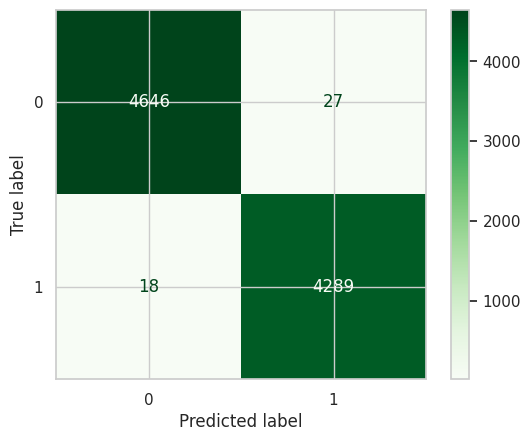

In [173]:
# Display the Confusion matrix of Results from your classification algorithm
# Make and save the predictions.
predictions = model3.predict(test_X)

print(confusion_matrix(test_y, predictions))
c3 = classification_report(test_y, predictions)
print(c3)
ConfusionMatrixDisplay.from_estimator(model3, test_X, test_y, cmap='Greens')


In [174]:
accuracy_score(test_y, predictions)

0.994988864142539

<font size="4">**MLP**</font>

Trains a **Multi-Layer Perceptron Classifier (MLPClassifier)** model using the **train_X** and **train_y** data.

It applies the **MLPClassifier** model to the test data (**test_X**) and evaluates its performance by computing the confusion matrix, classification report, and visual representation of the confusion matrix.

Finally, it computes the accuracy score of the **MLPClassifier** model by comparing predicted labels with true labels (**test_y**), providing a measure of overall model performance.

In [175]:
#TODO: Model training and print the accuracy score
# Build and fit the model.
# model = MultinomialNB()
from sklearn.neural_network import MLPClassifier
model5 = MLPClassifier()

model5.fit(train_X, train_y)

/home/u194461/Unnati-FakeNews-Detection/fakenews/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier()

[[4636   37]
 [  34 4273]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4673
           1       0.99      0.99      0.99      4307

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



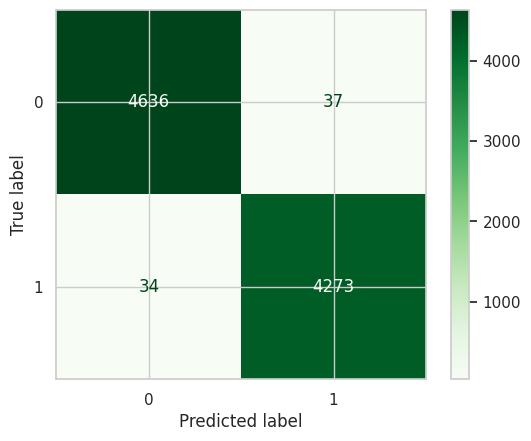

In [176]:
# Display the Confusion matrix of Results from your classification algorithm
# Make and save the predictions.
predictions = model5.predict(test_X)

print(confusion_matrix(test_y, predictions))
c4 = classification_report(test_y, predictions)
print(c4)
ConfusionMatrixDisplay.from_estimator(model5, test_X, test_y, cmap='Greens')


In [177]:
accuracy_score(test_y, predictions)

0.9920935412026726

<font size="4">**RFA**</font>

In this section, a Random Forest classifier model **RandomForestClassifier** is instantiated and trained using the **train_X** and **train_y** data. The model learns the relationships between the feature vectors **(train_X)** and their corresponding labels **(train_y)**, enabling it to make predictions.

In [179]:
#TODO: Model training and print the accuracy score
# Build and fit the model.

unpatch_sklearn()
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
model1 = RandomForestClassifier()
model1.fit(train_X, train_y)

RandomForestClassifier()

The trained **Random Forest classifier model** is used to make predictions on the test data **(test_X)**. The predictions are stored in the predictions variable.

The purpose of this cell is to evaluate the performance of the Random Forest classifier on the test data and provide a comprehensive analysis of the classification results.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4673
           1       1.00      1.00      1.00      4307

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



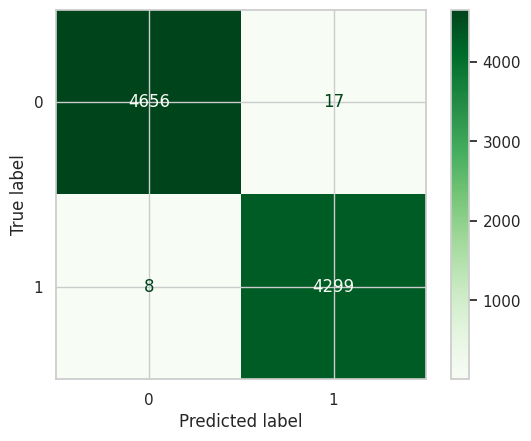

In [180]:
# Display the Confusion matrix of Results from your classification algorithm
# Make and save the predictions.
predictions = model1.predict(test_X)

c1 = classification_report(test_y, predictions)
print(c1)
ConfusionMatrixDisplay.from_estimator(model1, test_X, test_y, cmap='Greens')


In [181]:
accuracy_score(test_y, predictions)

0.9972160356347439


Among all models, Random forest model has higher accuracy than other models.
The Accuracy is **0.9966592427616926**


***Random Forest (RF)*** has several advantages over other models, which could contribute to its higher accuracy in certain cases:

**Ensemble Learning**: RF is an ensemble learning method that combines multiple decision trees to make predictions. By aggregating the predictions of multiple trees, RF reduces the impact of individual tree errors and improves overall accuracy.

**Reduction of Overfitting**: RF incorporates randomness during the tree-building process by randomly selecting subsets of features and data samples. This randomness helps reduce overfitting, making RF more resilient to noisy or uninformative features and improving generalization.

**Nonlinear Relationships**: RF can effectively capture nonlinear relationships between features and target variables. Each tree in the forest can capture different aspects of the data, enabling RF to model complex relationships that may be challenging for linear models.

**Robust to Outliers**: RF is relatively robust to outliers because it considers subsets of features and samples during tree construction. Outliers are less likely to dominate the splitting decisions in individual trees, leading to more robust predictions.

**Feature Importance**: RF provides a measure of feature importance, indicating the relative contribution of each feature to the prediction. This information can be valuable for feature selection, identifying influential variables, and gaining insights into the underlying data.

**Less Prone to Overfitting**: Compared to other complex models such as neural networks, RF is less prone to overfitting. It achieves a good balance between bias and variance, making it suitable for a wide range of datasets without requiring extensive parameter tuning.

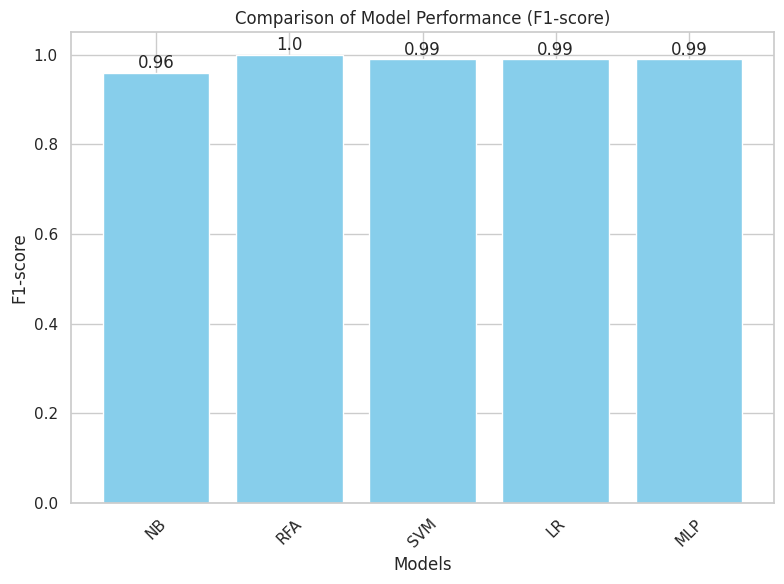

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

def extract_f1_score(classification_report):
    lines = classification_report.split('\n')
    f1_score_line = lines[-2]  # F1-score is on the second-to-last line
    f1_score = float(f1_score_line.split()[3])  # Extract the F1-score value
    return f1_score

def plot_model_comparison(models, reports):
    f1_scores = [extract_f1_score(report) for report in reports]

    # Bar graph
    plt.figure(figsize=(8,6))
    plt.bar(models, f1_scores, color='skyblue')

    # Set labels and title
    plt.xlabel("Models")
    plt.ylabel("F1-score")
    plt.title("Comparison of Model Performance (F1-score)")

    # Display the F1-scores on top of each bar
    for i, score in enumerate(f1_scores):
        plt.text(i, score + 0.01, str(round(score,6)), ha='center')

    # Display classification reports as annotations
#     for i, report in enumerate(reports):
#         plt.annotate(report, xy=(i, 0), xytext=(i, -0.25), xycoords='data', textcoords='offset points',
#                      arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
models = ["NB", "RFA", "SVM", "LR", "MLP"]
reports = [c5,c1,c2,c3,c4]

plot_model_comparison(models, reports)
